In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Definição da amostra

In [9]:
popu = pd.read_csv("Popu_series.csv")
popu = popu.sample(frac=0.2, replace=False, random_state=195)
len(popu)

120

In [10]:
popu.to_csv("Amostra.csv")

# Análise Exploratória

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [10]:
imdb = pd.read_csv("imdb_series.csv")
twitter = pd.read_csv("series_dataset_count/dataset_count.csv")

In [11]:
twitter

,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,IMDBid
0,SexEducation,2019-01-11,2217,13963,49879,66059,7767422
1,StrangerThings,2016-07-15,2928,37867,472360,513155,4574334
2,OnMyBlock,2018-03-16,158,3451,30336,33945,7879820
3,TheCrown,2016-11-04,2717,15581,35809,54107,4786824
4,Ozark,2017-07-21,1360,4864,31426,37650,5071412
5,OuterBanks,2020-04-15,1096,3120,38135,42351,10293938
6,Love101,2020-04-24,3158,7060,12975,23193,10516352
7,LockeAndKey,2020-02-07,3571,8742,19702,32015,3007572
8,NarcosMexico,2018-11-16,1543,6259,11746,19548,8714904
9,LostInSpace,2018-04-13,5637,12281,20918,38836,5232792


In [12]:
imdb.head()

,Unnamed: 0,Titulo,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,Data de estréia,Data dos episodios,Roteiristas,Censura,País,Idiomas,Episodios
0,0,Sex Education,7767422,8.3,224665.0,"Asa Butterfield, Gillian Anderson, Emma Mackey...","Comedy, Drama",45,25.0,2019.0,11/01/2019,"11/01/2019, 11/01/2019, 11/01/2019, 11/01/2019...","Laurie Nunn, Laurie Nunn, Sophie Goodhart","Argentina:16, Australia:MA15+::(self-applied),...",United Kingdom,English,8.0
1,1,Stranger Things,4574334,8.7,921986.0,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...","Drama, Fantasy, Horror, Mystery, Sci-Fi, Thriller",51,25.0,2016.0,11/07/2016,"11/07/2016, 15/07/2016, 15/07/2016, 15/07/2016...","Matt Duffer, Matt Duffer, Matt Duffer","Argentina:16, Australia:M, Australia:MA15+::(s...",United States,"English, Russian",8.0
2,2,On My Block,7879820,8.0,14065.0,"Sierra Capri, Jason Genao, Brett Gray, Diego T...","Comedy, Drama",30,25.0,2018.0,16/03/2018,"16/03/2018, 16/03/2018, 16/03/2018, 16/03/2018...","Eddie Gonzalez, Eddie Gonzalez, Jeremy Haft","Australia:M, Brazil:16::(self-applied), France...",United States,English,10.0
3,3,The Witcher,5180504,8.2,355432.0,"Henry Cavill, Anna Shaffer, Freya Allan, Graha...","Action, Adventure, Fantasy, Mystery",60,25.0,2019.0,20/12/2019,"20/12/2019, 20/12/2019, 20/12/2019, 20/12/2019...","Andrzej Sapkowski, Andrzej Sapkowski, Lauren S...","Argentina:16, Australia:MA15+::(Netflix self-r...","Poland, United States, Hungary",English,8.0
4,4,The Crown,4786824,8.6,176875.0,"Claire Foy, Olivia Colman, Imelda Staunton, Ma...","Biography, Drama, History",58,25.0,2016.0,07/01/2016,"07/01/2016, 04/11/2016, 04/11/2016, 04/11/2016...","Peter Morgan, Peter Morgan, Peter Morgan","Argentina:16, Australia:MA15+, Australia:M::(s...",United Kingdom,English,10.0


In [65]:
dados = pd.merge(imdb, twitter, on = "IMDBid")
dados.drop(dados[dados["Nome"]=="LoveDeathandRobots"].index, inplace=True)
dados.head()

,Unnamed: 0,Titulo,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Censura,País,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal
0,0,Sex Education,7767422,8.3,224665.0,"Asa Butterfield, Gillian Anderson, Emma Mackey...","Comedy, Drama",45,25.0,2019.0,...,"Argentina:16, Australia:MA15+::(self-applied),...",United Kingdom,English,8.0,SexEducation,2019-01-11,2217,13963,49879,66059
1,1,Stranger Things,4574334,8.7,921986.0,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...","Drama, Fantasy, Horror, Mystery, Sci-Fi, Thriller",51,25.0,2016.0,...,"Argentina:16, Australia:M, Australia:MA15+::(s...",United States,"English, Russian",8.0,StrangerThings,2016-07-15,2928,37867,472360,513155
2,2,On My Block,7879820,8.0,14065.0,"Sierra Capri, Jason Genao, Brett Gray, Diego T...","Comedy, Drama",30,25.0,2018.0,...,"Australia:M, Brazil:16::(self-applied), France...",United States,English,10.0,OnMyBlock,2018-03-16,158,3451,30336,33945
3,4,The Crown,4786824,8.6,176875.0,"Claire Foy, Olivia Colman, Imelda Staunton, Ma...","Biography, Drama, History",58,25.0,2016.0,...,"Argentina:16, Australia:MA15+, Australia:M::(s...",United Kingdom,English,10.0,TheCrown,2016-11-04,2717,15581,35809,54107
4,5,Ozark,5071412,8.4,215750.0,"Jason Bateman, Laura Linney, Sofia Hublitz, Sk...","Crime, Drama, Thriller",60,25.0,2017.0,...,"Argentina:16, Australia:MA15+, Brazil:16, Cana...",United States,English,10.0,Ozark,2017-07-21,1360,4864,31426,37650


## Nota do IMDB e número de votos por engajamento por engajamento

<AxesSubplot:xlabel='Nota', ylabel='CountTotal'>

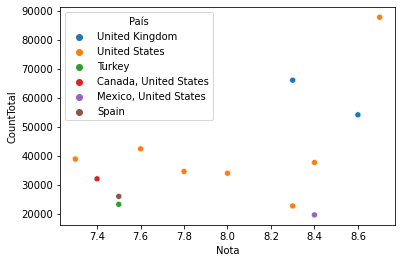

In [66]:
#dados['Nota'] CountPre	CountDurante	CountPos	CountTotal

sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Nota", y="CountTotal", hue=dados['País'])
#sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Nota", y="CountPre")
#sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Nota", y="CountDurante")
#sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Nota", y="CountPos")


In [67]:
dados[dados['Titulo'] != "Stranger Things"].corr(method='pearson')
#dados.corr(method='spearman')

,Unnamed: 0,IMDBid,Nota,Votos,Duração,Reviews,Ano,Episodios,CountPre,CountDurante,CountPos,CountTotal
Unnamed: 0,1.000000,-0.241737,0.078281,0.241430,-0.207640,NaN,-0.408546,-0.036030,0.178823,0.204370,-0.014569,0.042993
IMDBid,-0.241737,1.000000,-0.313318,-0.650387,-0.394975,NaN,0.682437,-0.336546,-0.285699,-0.424586,-0.428416,-0.501259
Nota,0.078281,-0.313318,1.000000,0.667097,-0.035247,NaN,-0.720825,0.128761,-0.313677,0.246548,0.512191,0.495229
Votos,0.241430,-0.650387,0.667097,1.000000,0.346293,NaN,-0.801385,0.483081,-0.082951,0.499827,0.857160,0.880343
Duração,-0.207640,-0.394975,-0.035247,0.346293,1.000000,NaN,-0.243839,0.467196,0.092865,0.224466,0.217895,0.252777
Reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ano,-0.408546,0.682437,-0.720825,-0.801385,-0.243839,NaN,1.000000,-0.303858,0.074855,-0.363103,-0.576315,-0.596130
Episodios,-0.036030,-0.336546,0.128761,0.483081,0.467196,NaN,-0.303858,1.000000,-0.216951,0.125510,0.576452,0.535778
CountPre,0.178823,-0.285699,-0.313677,-0.082951,0.092865,NaN,0.074855,-0.216951,1.000000,0.431655,-0.250830,-0.063047
CountDurante,0.204370,-0.424586,0.246548,0.499827,0.224466,NaN,-0.363103,0.125510,0.431655,1.000000,0.364268,0.574279


<AxesSubplot:xlabel='Ano', ylabel='Votos'>

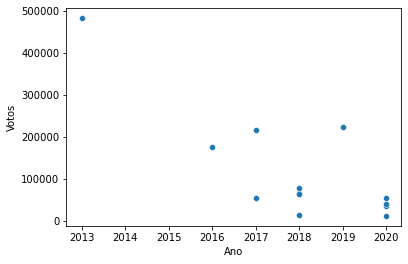

In [68]:
sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Ano", y="Votos")

<AxesSubplot:xlabel='Votos', ylabel='CountTotal'>

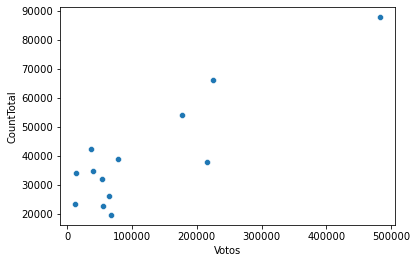

In [69]:
sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Votos", y="CountTotal")

<AxesSubplot:xlabel='Nota', ylabel='Votos'>

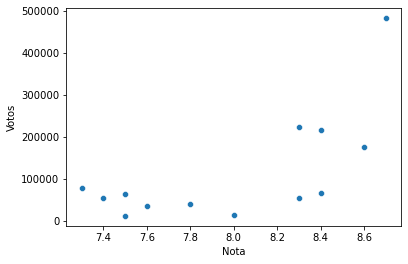

In [70]:
sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Nota", y="Votos")

## Número e duração de episódios por engajamento

<AxesSubplot:xlabel='Episodios', ylabel='CountTotal'>

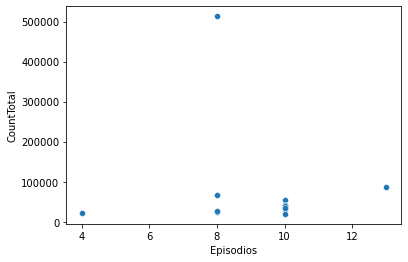

In [71]:
sns.scatterplot(data=dados, x="Episodios", y="CountTotal")

<AxesSubplot:xlabel='Duração', ylabel='CountTotal'>

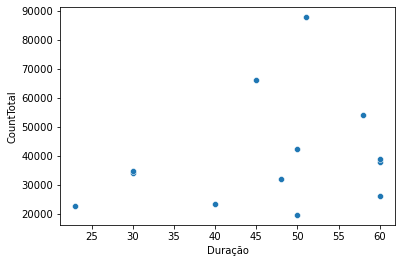

In [72]:
sns.scatterplot(data=dados[dados['Titulo'] != "Stranger Things"], x="Duração", y="CountTotal")

## Atores e engajamento

## Influência de engajamento anterior no posterior

<AxesSubplot:xlabel='CountPre', ylabel='CountDurante'>

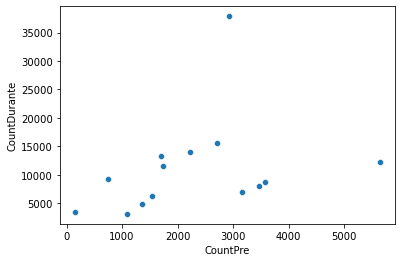

In [75]:
sns.scatterplot(data=dados, x="CountPre", y="CountDurante")

<AxesSubplot:xlabel='CountDurante', ylabel='CountPos'>

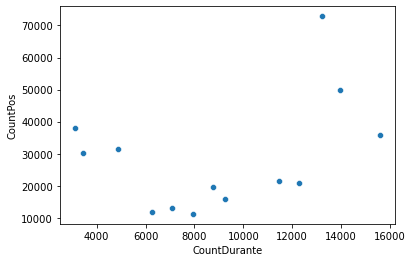

In [76]:
sns.scatterplot(data=dados[dados['Titulo']!="Stranger Things"], x="CountDurante", y="CountPos")

## Engajamento e genêro

In [ ]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
dados['Gênero']

In [90]:
pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Mystery,Romance,Sci-Fi,Thriller
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1
6,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1
8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0


## Censura e engajamento

## Reviews e engajamento